In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

In [9]:
from netCDF4 import Dataset
data = Dataset('./InputData/coarse_tmmn.nc')
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2009, 1, 15),
                       data.variables['day'])
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp = data.variables['air_temperature'][timeindex]

<ipython-input-10-9ecaa95a88ba>:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(lon, lat, temp,


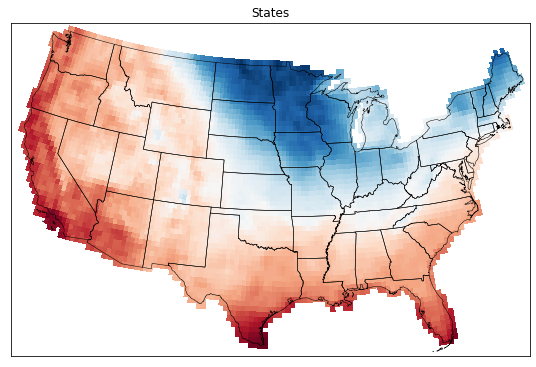

In [10]:
fig = plt.figure(figsize = (9.3, 14.12))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=32,lat_2=49,lon_0=-95)
shp_info = m.readshapefile('./InputData/st99_d00','states',drawbounds=True)
statenames=[]
for shapedict in m.states_info:
    statename = shapedict['NAME']
    statenames.append(statename)
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        poly = Polygon(seg,facecolor=None,edgecolor='black', alpha=0)
        ax.add_patch(poly)
plt.title('States')


m.pcolormesh(lon, lat, temp,
             latlon=True, cmap='RdBu_r',shading="nearest")
#m.shadedrelief(scale=0.5)
#m.drawcoastlines(color='lightgray')

plt.show()